# TOM pattern recognition from time series data : paper plots

```
Author: Gcinizwe Dlamini
```
<hr>

```
Main libraries used :     
- matplotlib
- stumpy
```

In [1]:
import tslearn
from tslearn.generators import random_walks
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import matplotlib.pyplot as plt
# For matrix profile calculations
import stumpy

In [2]:
from utils import *
import numpy as np
import plotly.express as px
import pandas as pd

In [3]:
all_data = get_data()

total filtered repos : 443
Max commits in data : 1838


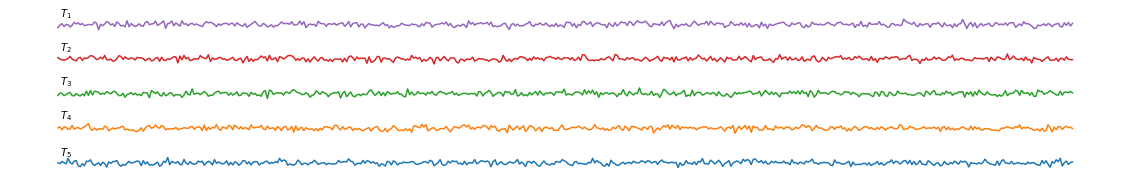

In [5]:
plt.rcParams["figure.figsize"] = (20,3)
x = np.arange(500)
for i in range(5):
    y = np.random.normal(0,1, 500) + i*20
    plt.plot(x, y, label = "line 1")
    plt.text(x[1], y[1]+5, f'$T_{5-i}$')

plt.yticks([])
plt.xticks([])
# plt.tick_params(top='on', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
plt.box(False)

plt.show()

In [6]:
def calc_profile_matrix(x, m=10, tot_motifs=3):
    """Function to calulate 1-dimensional matrix profiles given subsequence size (m)"""
    mps = {}  # Store the 1-dimensional matrix profiles
    motifs_idx = {}  # Store the index locations for each pair of 1-dimensional motifs (i.e., the index location of two smallest matrix profile values within each dimension)
    mps = stumpy.stump(x, m)
    motif_distance = np.round(mps[:, 0].min(), 1)
    motifs_idx = np.argsort(mps[:, 0])[:tot_motifs]
    print(f'The motif pair matrix profile value in is {motif_distance}')
        # motifs_idx.keys()

    return mps, motifs_idx

In [7]:
T = np.random.normal(0,1, 500)
mps, motifs_idx = calc_profile_matrix(T)

The motif pair matrix profile value in is 0.8


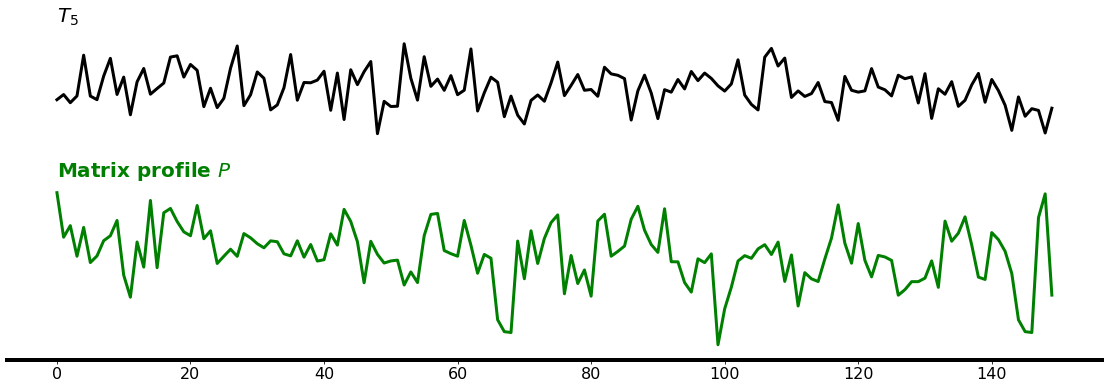

In [63]:
# plt.box(True)
plt.rcParams["figure.figsize"] = (20,3)
fig, ax = plt.subplots()
x = np.arange(500)
for i in range(1):
    tt = np.abs(MinMaxScaler().fit_transform(T.reshape(-1,1))).reshape(-1,1)+3.0
    ax.plot(mps[:,0][:150],c='green', linewidth=3, label = "line 1")
    plt.text(x[0], tt[0]+0.8, f'$T_{5-i}$', {"fontsize":20, 'color':'black','fontweight':'bold'})
    ax.plot(x[:150], tt[:150], c='black', linewidth=3)
    plt.text(x[0], tt[0]-0.8, f'Matrix profile $P$', {"fontsize":20, 'color':'green','fontweight':'bold'})

plt.yticks([])
[i.set_linewidth(4) for i in ax.spines.values()]
plt.xticks(fontsize=16)
# plt.box(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.set_size_inches(15.5, 5.5)
plt.tight_layout()

plt.savefig('aa.eps',bbox_inches='tight')
plt.show()

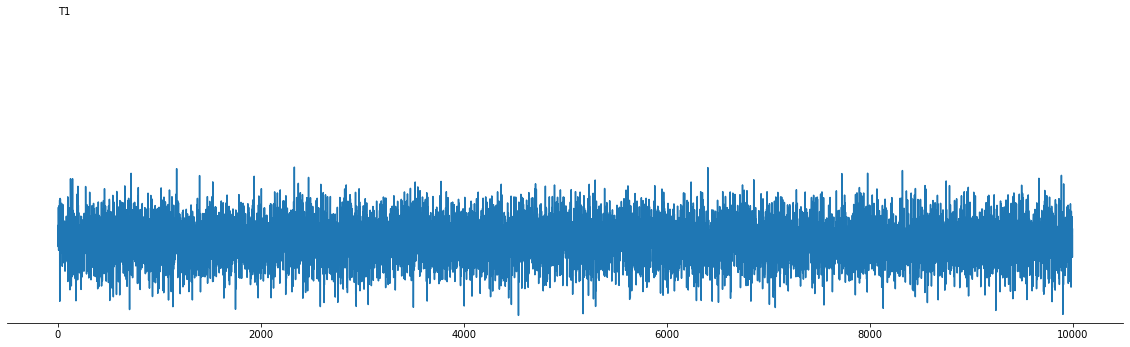

In [16]:
plt.rcParams["figure.figsize"] = (20,3)
fig, ax = plt.subplots()
x = np.arange(10000)
y = np.random.normal(0.1,0.1, 10000)
ax.plot(x, y, label = "line 1")
ax.text(x[1], y[1]+1, f'T1')
plt.yticks([])
# plt.box(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
for i in list(all_data.keys())[10:15]:
    a = all_data[i].get('total_changed')[:80]
    res = np.abs(MinMaxScaler().fit_transform(a.reshape(-1,1))).reshape(-1,1)
    plt.plot(np.arange(80), res, label = "line 1")

plt.show()